In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline

from mpmath import *
import numpy as np
import pandas as pd


In [2]:
mp.dps = 80; mp.pretty = True

In [3]:
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

m1 = mpf('1e-10')  #GeV 

#current values to Square mass differences
d21 = Nudata.squareDm21.central*mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = Nudata.squareDm31.central*mpf('1e-18')

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = sqrt(m1**2 + d21)
m3 = sqrt(m1**2 + d31)

########################################
### numpy

m1_sp = 1e-12  #GeV 

#current values to Square mass differences
d21_sp = Nudata.squareDm21.central*1e-18# factor to convert eV^2 to GeV^2
d31_sp = Nudata.squareDm31.central*1e-18

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2_sp = np.sqrt(m1_sp**2 + d21_sp)
m3_sp = np.sqrt(m1_sp**2 + d31_sp)

m4 = lambda m6: m6/3
m5 = lambda m6: m6/2


m4 = lambda m6: m6/3
m5 = lambda m6: m6/2

# Seesaw

## mpmath

In [4]:
from cLFV import BR_lm_gammalk, Ggamma
from cLFV import BR_lm_gammalk_svd

In [5]:
BR_lm_gammalk1 = lambda m,k,Width_lm,m6: BR_lm_gammalk_svd(m,k,Width_lm,m1,m2,m3,m4(m6),m5(m6),m6)
n = 300
expmp = linspace(-1,15,n)
m6 = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)


In [6]:

BR_lm_gammalk1(3,2,0.22,m6[-1])

2.5134993259534442090405359593044949604159138028806052565195391147578615684048006e-65

In [7]:
hb = mpf('6.58e-25')# GeV* s
t_tau = mpf('290.3e-15')# s
t_mu = mpf('2.1969811e-6')# 
Wtau_tot = hb/t_tau
Wmu_tot = hb/t_mu



In [8]:

BRtau_mugamma = np.array([BR_lm_gammalk1(3,2,Wtau_tot,m) for m in m6]);
BRtau_egamma = np.array([BR_lm_gammalk1(3,1,Wtau_tot,m) for m in m6]);
BRmu_egamma = np.array([BR_lm_gammalk1(2,1,Wmu_tot,m) for m in m6]);

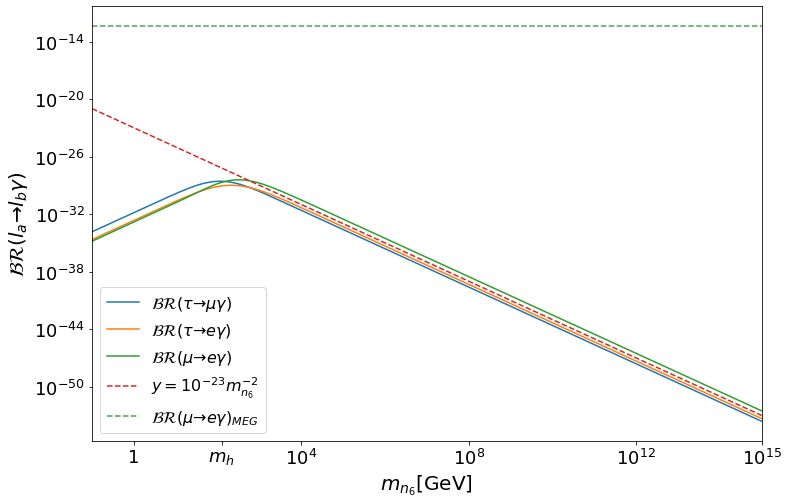

In [11]:
plt.figure(figsize=(12,8))
plt.loglog(m6,BRtau_mugamma,label=r'$\mathcal{BR}(\tau \to \mu \gamma)$')
plt.loglog(m6,BRtau_egamma,label=r'$\mathcal{BR}(\tau \to e \gamma)$')
plt.loglog(m6,BRmu_egamma,label=r'$\mathcal{BR}(\mu \to e \gamma)$')
plt.hlines(4.2e-13,0.1,1e15,linestyles='--',colors='green',
label=r'$\mathcal{BR}(\mu \to e \gamma)_{\mathit{MEG}}$',alpha=0.7)
plt.loglog(m6,1e-23*m6**(-2),'--',label=r'$y = 10^{-23}m_{n_6}^{-2}$')

plt.xlabel('$m_{n_6}$[GeV]',fontsize=20)
plt.ylabel(r'$\mathcal{BR}(l_a \to l_b \gamma)$',fontsize=20)
plt.xlim(1e-1,1e15)
plt.xticks(
    [1,125.1,1e4,1e8,1e12,1e15],
    ['1',r'$m_h$','$10^4$','$10^8$','$10^{12}$','$10^{15}$'],fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16,ncol=1,loc=3)
plt.savefig('BR_la_lbgamma.png')

In [10]:
from Unu_seesaw import Ynu, diagonalizationMnu, diagonalizationMnu_svd

In [11]:
def YY(a,b,m6):
    Y =  Ynu(m1,m2,m3,m6,m6,m6)
    YTc = matrix([[conj(Y[i,j]) for i in range(3)] for j in range(3)])
    YY = Y*YTc
    return YY[a-1,b-1]

def UU(a,b,m6):
    Mi,UL,UR = diagonalizationMnu(m1,m2,m3,m6,m6,m6)
    URc = matrix([[conj(UR[i,j]) for i in range(6)] for j in range(6)])
    UUn = UL*URc
    return UUn[2,3]

from Unu_seesaw_ISS import diagonalizationMnu_ISS
def UU_ISS(a,b,m6,mux=mpf('1e-7')):
    Mi,UL,UR = diagonalizationMnu_ISS(m1,m2,m3,m6,m6,m6,mux,mux,mux)
    URc = matrix([[conj(UR[i,j]) for i in range(9)] for j in range(9)])
    UUn = UL*URc
    return UUn[2,3]

In [12]:
M,U,W = diagonalizationMnu(m1,m2,m3,mpf('100'),mpf('100'),mpf('100'))

In [13]:
Wc = matrix([[W[i,j] for i in range(6)] for j in range(6)]).T
nprint(chop(W-Wc))

[0.0  0.0  0.0  0.0  0.0  0.0]
[0.0  0.0  0.0  0.0  0.0  0.0]
[0.0  0.0  0.0  0.0  0.0  0.0]
[0.0  0.0  0.0  0.0  0.0  0.0]
[0.0  0.0  0.0  0.0  0.0  0.0]
[0.0  0.0  0.0  0.0  0.0  0.0]


In [14]:
WcT = matrix([[conj(W[i,j]) for i in range(6)] for j in range(6)])
nprint(chop((U*WcT)[2-1,3-1] - fsum([U[2-1,i]*conj(W[3-1,i]) for i in range(6)])))

0.0


In [15]:
YYmp23 = np.array([abs(YY(2,3,m)/m) for m in m6])
# YYmp13 = np.array([abs(YY(1,3,m)/m) for m in m6])
# YYmp12 = np.array([abs(YY(1,2,m)/m) for m in m6])

UUmp23 = np.array([abs(UU(2,3,m)) for m in m6])
# UUmp13 = np.array([abs(UU(1,3,m)) for m in m6])
# UUmp12 = np.array([abs(UU(1,2,m)) for m in m6])

UUmp23_ISS = np.array([abs(UU_ISS(2,3,m)) for m in m6])
# UUmp13_ISS = np.array([abs(UU_ISS(1,3,m)) for m in m6])
# UUmp12_ISS = np.array([abs(UU_ISS(1,2,m)) for m in m6])

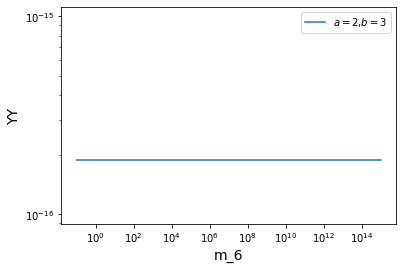

In [16]:
plt.loglog(m6,YYmp23,label='$a=2$,$b=3$')
# plt.loglog(m6,YYmp13,label='$a=1$,$b=3$')
# plt.loglog(m6,YYmp12,label='$a=1$,$b=2$')
plt.ylabel('YY',fontsize=14)
plt.xlabel('m_6',fontsize=14)
plt.legend()

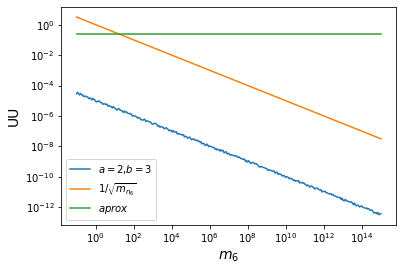

In [21]:
plt.loglog(m6,UUmp23,label='$a=2$,$b=3$')
# plt.loglog(m6,UUmp13,label='$a=1$,$b=3$')
# plt.loglog(m6,UUmp12,label='$a=1$,$b=2$')
plt.loglog(m6,np.array([1/mp.sqrt(m) for m in m6]),label=r'$1/\sqrt{m_{n_6}}$')
plt.loglog(m6,np.array([m1**2/(16*m**2) - (8*m1*m)/m**2 + mpf('0.25') for m in m6]),label=r'$aprox$')


plt.ylabel('UU',fontsize=14)
plt.xlabel('$m_6$',fontsize=14)
plt.legend()

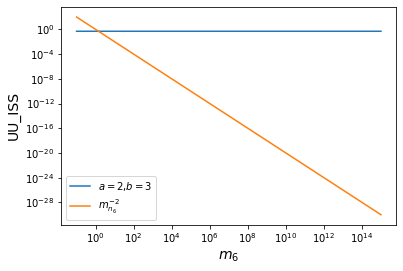

In [18]:
plt.loglog(m6,UUmp23_ISS,label='$a=2$,$b=3$')
# plt.loglog(m6,UUmp13_ISS,label='$a=1$,$b=3$')
# plt.loglog(m6,UUmp12_ISS,label='$a=1$,$b=2$')
plt.loglog(m6,np.array([1/m**2 for m in m6]),label=r'$m_{n_6}^{-2}$')

plt.ylabel('UU_ISS',fontsize=14)
plt.xlabel('$m_6$',fontsize=14)
plt.legend()

# Inverse Seesaw

## mpmath

In [10]:
from cLFV import BR_lm_gammalk_ISS_svd,BR_lm_gammalk_ISS
from Unu_seesaw_ISS import Mnu, diagonalizationMnu_ISS,diagonalizationMnu_ISS_svd

In [11]:
M,UL,UR = diagonalizationMnu_ISS(
    m1,m2,m3,mpf('100'),mpf('100'),mpf('100'),mpf('1e-7'),mpf('1e-7'),mpf('1e-7'))

In [12]:
nprint(chop(M))

[-99.95, -99.9498, -99.944, -1.12032e-10, -1.0047e-10, -1.001e-10, 99.944, 99.9498, 99.95]


In [13]:
M_svd,UL_svd,UR_svd = diagonalizationMnu_ISS_svd(
    m1,m2,m3,mpf('1e7'),mpf('1e7'),mpf('1e7'),mpf('1e-7'),mpf('1e-7'),mpf('1e-7'))

In [14]:
nprint(chop(M_svd))

[ 1.00056e+7]
[ 1.00056e+7]
[  1.0005e+7]
[  1.0005e+7]
[  1.0005e+7]
[  1.0005e+7]
[1.11781e-10]
[1.00268e-10]
[9.99001e-11]


In [15]:
BR_lm_gammalk1_ISS = lambda m,k,Width_lm,MR,muX: BR_lm_gammalk_ISS_svd(m,k,Width_lm,m1,m2,m3,MR,MR,MR,muX,muX,muX)
n = 200
expmp = linspace(2,7,n)
MRmp = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [20]:
mux=mpf('1e-7')
BRtau_mugamma_ISS = np.array([BR_lm_gammalk1_ISS(3,3,Wtau_tot,m,mux) for m in MRmp]);
BRtau_egamma_ISS = np.array([BR_lm_gammalk1_ISS(3,1,Wtau_tot,m,mux) for m in MRmp]);
BRmu_egamma_ISS = np.array([BR_lm_gammalk1_ISS(2,1,Wtau_tot,m,mux) for m in MRmp]);

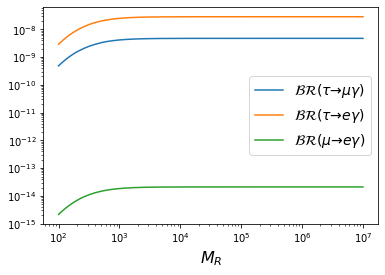

: 

In [21]:
plt.loglog(MRmp,BRtau_mugamma_ISS,label=r'$\mathcal{BR}(\tau \to \mu \gamma)$')
plt.loglog(MRmp,BRtau_egamma_ISS,label=r'$\mathcal{BR}(\tau \to e \gamma)$')
plt.loglog(MRmp,BRmu_egamma_ISS,label=r'$\mathcal{BR}(\mu \to e \gamma)$')
plt.xlabel('$M_R$',fontsize=16)
plt.legend(fontsize=14)
plt.savefig('BRcLFV_ISS.png')

In [44]:
BRmu_egamma_ISS_1 = np.array(
    [BR_lm_gammalk1_ISS(2,1,Wtau_tot,m,mpf('1e-8')) for m in MRmp]);
BRmu_egamma_ISS_2 = np.array(
    [BR_lm_gammalk1_ISS(2,1,Wtau_tot,m,mpf('1e-6')) for m in MRmp]);
BRmu_egamma_ISS_3 = np.array(
    [BR_lm_gammalk1_ISS(2,1,Wtau_tot,m,mpf('1e-4')) for m in MRmp]);
BRmu_egamma_ISS_4 = np.array(
    [BR_lm_gammalk1_ISS(2,1,Wtau_tot,m,mpf('1e-2')) for m in MRmp]);

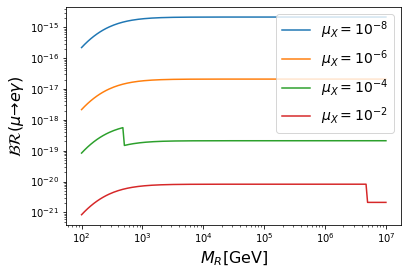

In [45]:
plt.loglog(MRmp,BRmu_egamma_ISS_1,label=r'$\mu_X=10^{-8}$')
plt.loglog(MRmp,BRmu_egamma_ISS_2,label=r'$\mu_X=10^{-6}$')
plt.loglog(MRmp,BRmu_egamma_ISS_3,label=r'$\mu_X=10^{-4}$')
plt.loglog(MRmp,BRmu_egamma_ISS_4,label=r'$\mu_X=10^{-2}$')


plt.xlabel('$M_R$[GeV]',fontsize=16)
plt.legend(fontsize=14)
plt.ylabel(r'$\mathcal{BR}(\mu \to e \gamma)$',fontsize=16);
#plt.savefig('BRcLFV_ISS.png')

In [46]:
n = 200
expmp = linspace(-10,0,n)
muxmp = np.array([mpf('10.0')**k for k in expmp])

BRmu_egamma_ISS_MR1 = np.array(
    [BR_lm_gammalk1_ISS(2,1,Wtau_tot,mpf('1e6'),m) for m in muxmp]);
BRmu_egamma_ISS_MR2 = np.array(
    [BR_lm_gammalk1_ISS(2,1,Wtau_tot,mpf('1e5'),m) for m in muxmp]);
BRmu_egamma_ISS_MR3 = np.array(
    [BR_lm_gammalk1_ISS(2,1,Wtau_tot,mpf('1e4'),m) for m in muxmp]);
BRmu_egamma_ISS_MR4 = np.array(
    [BR_lm_gammalk1_ISS(2,1,Wtau_tot,mpf('1e3'),m) for m in muxmp]);

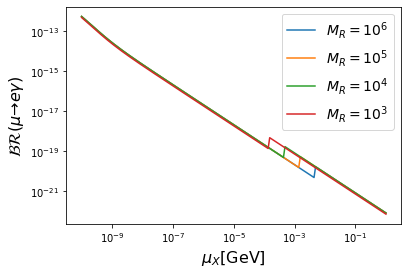

In [47]:
plt.loglog(muxmp,BRmu_egamma_ISS_MR1,label=r'$M_R =10^{6}$')
plt.loglog(muxmp,BRmu_egamma_ISS_MR2,label=r'$M_R =10^{5}$')
plt.loglog(muxmp,BRmu_egamma_ISS_MR3,label=r'$M_R =10^{4}$')
plt.loglog(muxmp,BRmu_egamma_ISS_MR4,label=r'$M_R =10^{3}$')


plt.xlabel(r'$\mu_X$[GeV]',fontsize=16)
plt.legend(fontsize=14)
plt.ylabel(r'$\mathcal{BR}(\mu \to e \gamma)$',fontsize=16);
#plt.savefig('BRcLFV_ISS.png')

Aproximation 

In [48]:
from Unu_seesaw_ISS import Ynu
def BRhlklm(k,m,MR,mux):
    v = mpf('246')
    Y =  Ynu(m1,m2,m3,MR,MR,MR,mux,mux,mux)
    YTc = matrix([[conj(Y[i,j]) for i in range(3)] for j in range(3)])
    #nprint(chop(Y.T-YTc))
    YY = Y*YTc
    #print(YY)
    YYYY = YY*YY
    return  mpf('1e-7')*((v**4)/(MR**4))*abs(YY[k-1,m-1] - mpf('5.7')*YYYY[k-1,m-1])**2

nprint(chop(BRhlklm(2,3,2,1)))

1.82678e-28


In [49]:
BRhmutau_1_approx = np.array(
    [BRhlklm(2,3,m,mpf('1e-8')) for m in MRmp]);
BRhmutau_2_approx = np.array(
    [BRhlklm(2,3,m,mpf('1e-6')) for m in MRmp]);
BRhmutau_3_approx = np.array(
    [BRhlklm(2,3,m,mpf('1e-4')) for m in MRmp]);
BRhmutau_4_approx = np.array(
    [BRhlklm(2,3,m,mpf('1e-2')) for m in MRmp]);

In [62]:
MR0 = sqrt(1e-8*((mpf('246')**2)/mpf('1e-12')))
MR0

24600.0000000000002573474982105802125604254278501796990095002286597502317822017308105752306983016651098947453597268731144499544463617486221365214342876

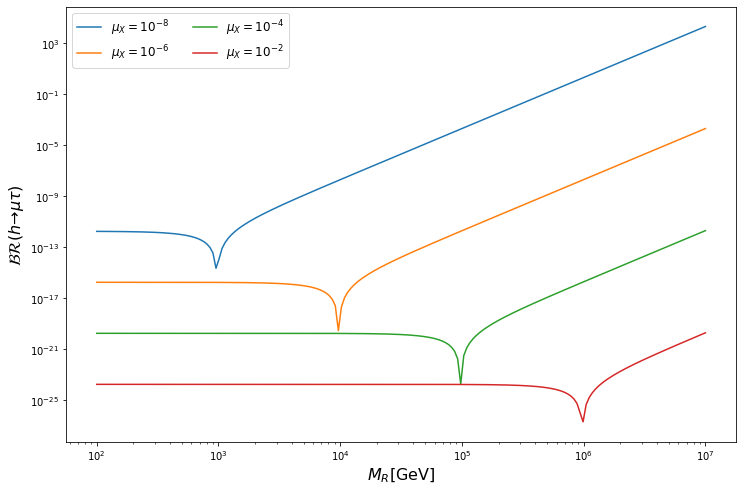

In [64]:
plt.figure(figsize=(12,8))
plt.loglog(MRmp,BRhmutau_1_approx,label=r'$\mu_X = 10^{-8}$')
plt.loglog(MRmp,BRhmutau_2_approx,label=r'$\mu_X = 10^{-6}$')
plt.loglog(MRmp,BRhmutau_3_approx,label=r'$\mu_X = 10^{-4}$')
plt.loglog(MRmp,BRhmutau_4_approx,label=r'$\mu_X = 10^{-2}$')
#plt.vlines(MR0,1e-25,1e-1)

plt.xlabel('$M_R$[GeV]',fontsize=16)
plt.legend(ncol=2,fontsize=12)
plt.ylabel(r'$\mathcal{BR}(h \to \mu \tau)$',fontsize=16);
#plt.savefig('BRcLFV_ISS.png')